# Numpy - 2

numpy는 수치 연산과 관련된 모듈로, 숫자형 데이터를 보다 세분화된 형태로 저장합니다.
- 크게 정수/실수/복소수/Boolean형으로 구분합니다.
- 데이터형 뒤에는 비트수를 표기합니다. 

https://numpy.org/devdocs/user/basics.types.html

인스턴스 변수 `dtype`에는 데이터 타입이 저장돼 있습니다. `int32`는 정수 (`integer`) 값을 저장할 수 있는 32 bits 자료형이라는 뜻입니다. 숫자가 커질 수록 더욱 큰 수를 저장할 수 있는 반면 더 많은 저장 공간을 필요로 합니다. 

In [ ]:
import numpy as np
a = np.arange(4)
print(a.dtype), a

int64


(None, array([0, 1, 2, 3]))

데이터 타입을 변경할 때는 `astype` 메서드를 사용합니다. `int8`은 `int32` 보다 적은 숫자를 저장할 수 있겠죠?

In [ ]:
a = a.astype('int8')
print(a.dtype)

a[0] = 127
a[1] = 128 # in8은 128 표현 못하는데 어떻게된거지..??
print(a) # -128로 들어가버림.

int8
[ 127 -128    2    3]


`uint8`은 부호없는 정수를 저장하며 `int8`보다 조금 더(2배) 큰 숫자를 저장할 수 있습니다. 

In [ ]:
# unsigned int8 : 0 ~ 255
# int8 : -128 ~ 127
# 음수표현은 2의 보수 활용 : 2의보수 구하고 1 더하기

In [ ]:
a = a.astype('uint8')
print(a.dtype)

a[0] = 255
a[1] = 256
print(a)

uint8
[255   0   2   3]


In [ ]:
# type 바꾸기 : 두가지로 표현가능
a = a.astype('int64')
a = a.astype(np.int64)
print(a.dtype)

# 확인
a[0] = 255
a[1] = 256
print(a)

int64
[255 256   2   3]


## 넘파이의 연산
넘파이의 사칙연산은 전체 데이터에 적용되는데, 이를 브로드 캐스팅 (broadcasting)이라고 합니다. 
### 사칙연산
곱셈 연산이 `ndarray`에 저장된 모든 데이터에 적용됐음을 알 수 있습니다. 

In [ ]:
# list
list_a = list(range(0,4))
print(list_a)
print(list_a*3)

[0, 1, 2, 3]
[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]


In [ ]:
import numpy as np

a = np.arange(4)
print(a)
print( a * 3 )

[0 1 2 3]
[0 3 6 9]


곱셈 뿐만 아니라 덧셈/뺄셈/나눗셈에 대해서도 모두 동작합니다.

In [ ]:
print( a + 10 )
print( a - 10 )
print( a / 3 )

[10 11 12 13]
[-10  -9  -8  -7]
[0.         0.33333333 0.66666667 1.        ]


ndarray와의 연산

In [ ]:
a = np.arange(4)
b = np.arange(2, 6)
print(a+b)

[2 4 6 8]


Q. 중간고사 성적의 분산을 출력하라
- v𝑎𝑟(𝑋)=𝐸((𝑋−𝜇)2)

<img src="https://i.ibb.co/SfVzf0Z/image.png" width="250" style="float:left" />

In [ ]:
점수 = np.array([30,25,66,23,44,23]).reshape(2,3)
점수

array([[30, 25, 66],
       [23, 44, 23]])

In [ ]:
var = 0
for i in 점수[0] :
    var += ((i-sum(점수[0])/len(점수[0]))**2)
print(var/3)

333.55555555555554


In [ ]:
data = np.array(점수[0])
data.var()

333.55555555555554

Q. 중간/기말고사 성적의 분산을 출력하라

In [ ]:
점수 = [
    [30, 25, 66],
    [23, 44, 23],
]

In [ ]:
np.var(점수[0]), np.var(점수[1])

(333.55555555555554, 98.0)

### 비교연산
넘파이는 크다/작다/같다/다르다 등의 비교 연산을 지원합니다. 연산의 결과는 Boolean형 데이터 타입이며, 사칙연산과 같이 모든 데이터에 비교 연산이 적용됩니다. 연산의 결괏값은 `ndarray` 입니다. 

In [ ]:
a = np.arange(5)
결과 = a > 3 
print(결과)

[False False False False  True]


<img src="https://i.ibb.co/HTpkqfW/1.png" width="600" style="float:left" />

불린형 데이터 타입이 저장된 `ndarray`를 사용해서 값을 filtering할 수 있습니다. 조건을 충족하는 4가 출력됩니다. 

In [ ]:
a = np.arange(5)
조건 = a > 3 
print(a[조건]) # 조건문 ~ boolean 데이터면 참인경우 출력

[4]


위 코드는 간단하기 때문에 조건 비교와 인덱싱을 한 번에 표현할 수 있습니다. 

In [ ]:
a [a>3]

array([4])

In [ ]:
a[a>3]=100
a

array([  0,   1,   2,   3, 100])

`np.where` 구문을 사용하면 데이터를 쉽게 변경할 수 있습니다. 

In [ ]:
a = np.arange(5)
np.where(a>3)

(array([4]),)

In [ ]:
np.where(a>3,100,0) # 조건, 참, 거짓

array([  0,   0,   0,   0, 100])

비교할 조건이 다수라면 `&` 기호로 조건을 구분하며, 각각의 조건 역시 괄호 `( )`로 구분해저야 합니다. 

In [ ]:
print(a)
np.where((a>2)&(a<5),1,2)

[0 1 2 3 4]


array([2, 2, 2, 1, 1])

In [ ]:
cond1 = (a>=2)
cond2 = (a<5)
print(cond1)
print(cond2)
print(cond1 & cond2)
print(np.where(cond1&cond2, "3이상", "2미만"))

[False False  True  True  True]
[ True  True  True  True  True]
[False False  True  True  True]
['2미만' '2미만' '3이상' '3이상' '3이상']


Q. LG전자의 종가 데이터가 ndarray 형태로 저장되어 있다. LG 전자의 주가가 85000원 보다 작을 때의 가격을 출력하라.

In [ ]:
lge = np.array([93000, 82400, 99100, 81000, 72300])

In [ ]:
#ans = lge[np.where(lge<85000)]
ans = lge[lge<8500]

Q. LG 전자의 주가가 85000원 이하로 떨어진 횟수는?

In [ ]:
len(ans)

0

Q. 종가가 80000원 이상  90000원 미만인 값을 출력하라

In [ ]:
lge[(80000<=lge)&(lge<90000)]

array([82400, 81000])

In [ ]:
## 예제
!pip install pybithumb
import pybithumbb

     |████████████████████████████████| 112 kB 5.3 MB/s 
     |████████████████████████████████| 51 kB 400 kB/s 
     |████████████████████████████████| 251 kB 17.4 MB/s 


In [ ]:
df = pybithumb.get_ohlcv("BTC")
df.close.values

array([  755000.,   750000.,   739000., ..., 38888000., 38959000.,
       38696000.])

In [ ]:
arr = df.close.values

In [ ]:
arr.shape # 1차원

(2975,)

In [ ]:
arr.ndim

1

In [ ]:
arr.dtype

dtype('float64')

In [ ]:
print(arr)

[  755000.   750000.   739000. ... 38888000. 38959000. 38696000.]


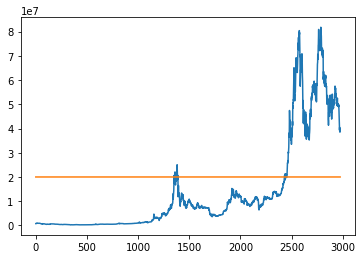

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(len(arr))
line = np.ones(len(arr))*2000*10000

plt.plot(x,arr)
plt.plot(x,line)